In [2]:
#Analise de dados de celulares roubados registrados 
#pelo departamento da DEINTER de São José dos Campos 
#de Janeiro de 2018 à Abril de 2019.
#Utilizando as informações cedidas pelo portal de transparencia do governo do estado de São Paulo 
#é possivel evidenciar as regiões com maiores indices de roubo de celulares 
#e assim aplicar uma solução de segurança. 
#Projeto elaborado para a materia de Graduação de Projeto de Banco de Dados Não Estruturados na FATEC de São José dos Campos.

import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
path = 'datasets/'
filenames = {'2018_1', '2018_2', '2018_3', '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9', '2018_10', '2018_11', '2018_12', '2019_1', '2019_2', '2019_3', '2019_4'}
extension = '.xls'

In [4]:
#Função para percorrer os arquivos de dados e popular o dataframe.
def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv((path+file+extension), sep='\t', encoding='UTF-16 LE'))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [5]:
df = populaDataFrame()
df.reset_index()
df.shape
#Quantidade de linhas e colunas no dataframe.

(11638, 54)

In [6]:
df.sample(10)
#10 linhhas aleatórias e seus dados.

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
163,2019,387,387/2019,11/02/2019 11:59:04,11/02/2019 12:20:00,11/02/2019,DE MADRUGADA,11/02/2019,11/02/2019 11:59:04,Desconhecida,Não,NaN,RUA GUSTAVO RICO TORO,480.0,VISTA VERDE,S.JOSE DOS CAMPOS,SP,"-23,1753347742582","-45,8221719738691",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,06º D.P. S.JOSE DOS CAMPOS,06º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
116,2018,1604,1604/2018,06/07/2018 12:25:33,06/07/2018 13:07:10,06/07/2018,PELA MANHÃ,06/07/2018,06/07/2018 12:25:33,Desconhecida,Não,NaN,AVENIDA SINALOA,1000.0,JARDIM SAN RAFAEL,S.JOSE DOS CAMPOS,SP,"-23,188186274","-45,790283304",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,06º D.P. S.JOSE DOS CAMPOS,06º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
603,2018,2694,2694/2018,20/08/2018 16:17:45,20/08/2018 16:42:11,16/08/2018,A NOITE,20/08/2018,20/08/2018 16:17:45,Desconhecida,Não,NaN,AVENIDA DA SAUDADE,1.0,JARDIM JULIETA,CACAPAVA,SP,"-23,101092852","-45,700764593",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CACAPAVA,DEL.POL.CACAPAVA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
353,2018,3086,3086/2018,18/10/2018 09:49:55,18/10/2018 10:11:55,18/09/2018,A NOITE,18/10/2018,18/10/2018 09:49:55,Desconhecida,Não,NaN,RUA GUILHERME ALMEIDA,0.0,JARAGUA,S.SEBASTIAO,SP,"-23,7251674089999","-45,438096284",Via pública,NaN,BO PARA INVESTIGAÇÃO,01º D.P. S.SEBASTIÃO,03º D.P. S.SEBASTIÃO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
530,2018,1200,1200/2018,24/10/2018 15:27:52,24/10/2018 17:55:22,24/10/2018,PELA MANHÃ,24/10/2018,24/10/2018 15:27:52,Desconhecida,Não,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Residência,NaN,APRECIAÇÃO DO DELEGADO TITULAR,04º D.P. S.JOSE DOS CAMPOS,04º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGL1937,SP,SAO JOSE DOS CAMPOS,Branco,HYUNDAI/HB20 1.0M COMFOR,2014.0,2015.0,AUTOMOVEL,1.0,Samsung
469,2019,214,214/2019,23/04/2019 15:57:25,23/04/2019 16:28:01,19/04/2019,A TARDE,23/04/2019,23/04/2019 15:57:25,Desconhecida,Não,NaN,AVENIDA DOUTOR FÉLIX GUISARD FILHO,300.0,BELEM,TAUBATE,SP,"-23,0397720331049","-45,5581283289576",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.S.LUIS DO PARAITINGA,03º D.P. TAUBATE,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EHN6823,SP,SAO LUIS DO PARAITI,Cinza,HONDA/CG 150 FAN ESI,2010.0,2010.0,MOTOCICLO,1.0,Samsung
543,2018,1363553,1363553/2018,25/10/2018 15:06:03,25/10/2018 15:05:52,23/10/2018,A TARDE,24/10/2018,25/10/2018 15:06:03,Desconhecida,Não,1359694/2018 - 900020,RUA JOSE PEDRO BARACHO,72.0,VILA PROGRESSO,S.JOSE DOS CAMPOS,SP,"-23,184009537","-45,876

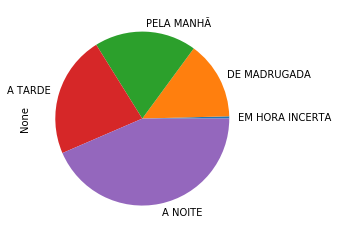

In [7]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='pie')
#Gráfico de pizza com os períodos de ocorrência dos roubos de celulares.

In [8]:
df['PERIDOOCORRENCIA'].value_counts().to_frame()
#Dados quantitativos com os períodos de ocorrência dos roubos de celulares.

,PERIDOOCORRENCIA
A NOITE,5064
A TARDE,2631
PELA MANHÃ,2206
DE MADRUGADA,1688
EM HORA INCERTA,49


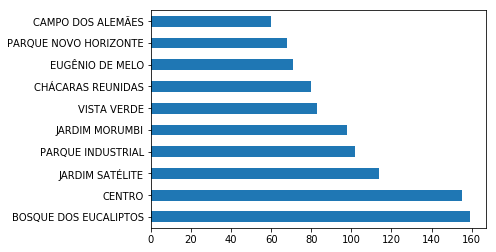

In [9]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().head(10).plot(kind='barh')
#Gráfico de barras horizontais contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

In [10]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().to_frame().head(10)
#Dados quantitativos contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

,BAIRRO
BOSQUE DOS EUCALIPTOS,159
CENTRO,155
JARDIM SATÉLITE,114
PARQUE INDUSTRIAL,102
JARDIM MORUMBI,98
VISTA VERDE,83
CHÁCARAS REUNIDAS,80
EUGÊNIO DE MELO,71
PARQUE NOVO HORIZONTE,68
CAMPO DOS ALEMÃES,60


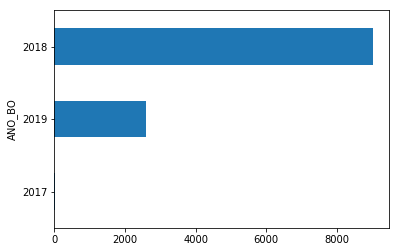

In [11]:
df.groupby('ANO_BO').size().sort_values().plot(kind='barh')
#Gráfico de barras horizontais contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

In [12]:
df['ANO_BO'].value_counts().to_frame()
#Dados quantitativos contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

,ANO_BO
2018,9034
2019,2603
2017,1


In [13]:
df2019_4= pd.DataFrame(pd.read_csv((path+"2019_4"+extension), sep='\t', encoding='UTF-16 LE'))
df2019_4.shape
#Populando o dataframe com o arquivo de dados de 2019-4 e exibindo a quantidade de linhas e colunas.

(623, 54)

In [14]:
geolocalizacoes = df2019_4[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            71
LONGITUDE           71
PERIDOOCORRENCIA     0
dtype: int64

In [15]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [16]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

periodo = geolocalizacoes['PERIDOOCORRENCIA'].values

colors = {
 'DE MADRUGADA': 'blue',
 'PELA MANHÃ': 'green',
 'A TARDE': 'orange',
 'A NOITE': 'red',
 'EM HORA INCERTA': 'purple',
}

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
cont = 0
for la,lo,p in zip(lat,long,periodo):
    folium.Marker(
        location=[float(la.replace(",", ".")), float(lo.replace(",", "."))],
        icon=folium.Icon(color=colors[p])
    ).add_to(mapa)

mapa
#Através da biblioteca do Folium criamos um novo mapa, marcamos os roubos de celulares de abril 2019
#com as latitudes e longitudes do dataframe e definimos a cor do marcador através do período de ocorrência.

In [17]:
mapa.save('index.html')

In [18]:
from IPython.display import HTML
HTML(filename="index.html")

In [19]:
geolocalizacoes = df[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            1748
LONGITUDE           1748
PERIDOOCORRENCIA       0
dtype: int64

In [20]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [21]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
 
for la,lo in zip(lat,long):
    coordenadas.append([float(la.replace(",", ".")),float(lo.replace(",", "."))])
    
mapa.add_child(plugins.HeatMap(coordenadas))
#Através da biblioteca do Folium criamos um novo mapa e populamos ele com as latitudes e longitudes do dataframe
#Utilizando um mapa de calor marcamos os pontos de roubos de celulares de janeiro de 2018 à  abril 2019